In [3]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf #needed for models in this script
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [4]:
pd.set_option('html', True) #see the dataframe in a more user friendly manner
%matplotlib inline

## Classification, Regression and Prediction Overview

After we've cleaned our data and become familiar with it, we have a dataset with a bunch of observations that have attributes x1...xn, and Y. Our goal, then, is to develop a model to predict Y for a given observation. Depending on what we're trying to predict, we can either attempt to classify a given observation, or perform a regression on a particular observation.

In statistics, regression is a measure of the relationship between the mean value of one variable with the corresponding value or values of another variable or other variables. Classification is the process of determining the category or class that an observation belongs to.

Both regression and classification comes under the domain of Supervised Learning. In supervised learning, the learning process has a "goal" - to predict the missing variable Y. Y is also called the target variable.

Supervised learning includes the following steps:

1. Process and generate the initial data set for modeling. The data set should be large enough. It will contain both the predictor variables (x1..xn) and the target variable Y.

2. Split the data into training and testing sets. The split needs to be performed in such a way that both the sets contain the same patterns of data. For example, if the initial data set has 100 observations, with the predictor value being 60 "Y" and 40 "N" in these observations, the individual training and testing sets should also have the Y and N in the same ratio of 3:2. Splitting is usually done through random selection. Typically, the training set will have 70% of the records in the initial data set.

3. Build a model based on the training data set.

4. Test the model using the test data set. We use the model to predict the value of Y in each of the test records. Then compare the predicted value with the actual value of Y (remember, the test data set also has the value of Y for all records). This gives an indication of the accuracy of the prediction model built.

5. Fine tune the model using cross-validation (http://scikit-learn.org/stable/modules/cross_validation.html). Try different algorithms and parameters. Repeat the process until the accuracy reaches an acceptable level.

6. Predict unknown data. Use the model built on new data (where Y is not known) to predict Y.

The level of accuracy required is dependent upon the problem being solved and the limitations of the dataset we're working with. You'll need to use good judgement to avoid both under- and overfitting your model.

### Classification

Classification, in machine learning and statistics, is the process of identifying the category or class that an observation belongs to. For example, determining if an email is spam or not spam is a classification process, as is determining if a patient has a disease or not.

Classification is a supervised learning technique that uses a training set of observations with categorical class labels - "spam" or "not spam", or "diabetes" or "no diabetes" - to create a classification model based on the attributes of each observation, and each observation's class label, to predict the class label of new observations. Classifiers are evaluated on whether or not they produce the correct class label for an observation.

Classification is often split up into binary classification and multiclass classification. In binary classification, we're trying to determine which one of two classes an observation belongs to: spam or not spam, diabetes or no diabetes, 1 or 0. In multiclass classification, we're trying to determine which one of n classes an observation belongs to. Many classification methods have been developed specifically for binary classification, and multiclass classification often requires the combined use of multiple binary classifiers.

Again, classification is a supervised learning technique; to perform classification, we need to have a dataset with correct class labels for training. When correct class labels are not available, the corresponding unsupervised learning technique we can use is clustering, which is the topic of the next lesson. Classification and clustering are both techniques used in the more general problem of pattern recognition.

### Regression

Regression is similar to classification in that a model is constructed. This model is used to predict an unknown or missing value Y. The key difference is that while classification models discrete categorical class labels, regression models continuous values. In addition, unlike classification, regression gives ordered values. In regression, we evaluate our model based on how close the predicted value is to the actual value of an observation.

Regression is concerned with constructing a model of the relationship between the dependent variable Y and the independent variable(s) x1...xn. The relationship can take many forms. For instance, the relationship we explored in Unit 1 took the form of a line.

We used logistic regression in Unit 1 to answer a yes/no question, which should indicate to you that we were performing a classification. On the other hand, it has "regression" in the name, which clearly indicates that we were performing a regression. Let's dive into this.

For each observation, logistic regression will produce an expected value in terms of a probability. When we're predicting a binary or otherwise categorical outcome, this makes things tricky. This is because regression models generate fitted values that lie some where along a continuous 0—1 scale (e.g., p = 0.68), whereas the actual values of the dependent variable are dichotomous (for all observations, y = 1 or y = 0).

Recall that, in order to get a yes/no prediction out of our logistic regression model, we had to determine a probability threshold above which we were confident that the answer was "yes" and below which we were confident the answer was "no". The threshold we picked was 0.70. By setting this threshold, we wrestled a regression technique into a classifiaction technique. Our model produced continuous values of p, and we converted those continuous values into discrete values using a threshold.

There's a very good discussion of these problems in The Separation Plot: A New Visual Method for Evaluating the Fit of Binary Models (http://onlinelibrary.wiley.com/doi/10.1111/j.1540-5907.2011.00525.x/abstract).

### Fitting and Overfitting

Recall the steps to building a supervised learning model above. Let's dive in to the process of building and evaluating supervised model (steps 2, 3, and 4).

Building a model (also called training or fitting) boils down to optimizing a set of parameters on the training set. For instance, in the case of linear regression, we assume a linear relationship between our features and our response variable, and learn the coefficients of the model from our training set. This occurs through minimizing our squared error loss function:

![](files/mp1.jpg)

With respect to each beta parameter (i.e. taking the partial derivatives and setting them to zero). Although the functional form and parameters can be very complex in other machine learning methods, this idea of learning parameters from a training set applies universally to supervised learning algorithms.

Now, why is it necessary to split our data into a training set and a testing set? Why can't we evaluate our model on the same data we used to train it? Simply put, if we evaluate the model on the same data we trained on, we will have a very optimistic view of our models performance because it was optimized directly on that data. In order to get a good estimate of our models performance on new data, we must separate the data we train on from the data we evaluate the model on.

Similarly to how we need to isolate training and testing data, we also need to be careful we don't fit our model too closely to our training data. When we learn our training data too closely, this is called over-fitting, and it is critical to be aware of this problem in any modeling task. Two very common way in which a model overfits is when we chose an overly complex model or when we have small amounts of data. Let's take a look at an example:

Suppose we wanted to use a linear regression with a predict our response with a single feature <b>X</b>. The form of our fitted line would be:

![](files/mp2.jpg)

Where beta_0 is the intercept. We could make this simple model more complex by adding polynomial terms of X, such as:

![](files/mp3.jpg)
or
![](files/mp4.jpg)

As we increase the number of polynomial terms, we would fit the training data more and more closely:

![](files/mp5.jpg)

As we fit our training set more closely, our training performance will increase (as you can see, the cubic curve fits the black datapoints more closely than the linear red curve). However, it is likely that we are overfitting to our training set, and that using the cubic curve to predict new data will perform more poorly than the simple model.

<b>Challenge:</b> Use the following code to generate a toy regression dataset, and split the data into 70% training and 30% testing data. Using mean squared error as a metric, compare the performance of different polynomial curves in the training set and in the testing set. 

In [5]:
# Set seed for reproducible results
np.random.seed(414)

# Gen toy data
X = np.linspace(0, 15, 1000)
y = 3 * np.sin(X) + np.random.normal(1 + X, .2, 1000)

train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

# Linear Fit
poly_1 = smf.ols(formula='y ~ 1 + X', data=train_df).fit()

# Quadratic Fit
poly_1 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=train_df).fit()

<b>Comment:</b> You are just thrown into the above again without any real explanation of what's happening. Clearer instructions are needed here. 

<b>Good Source for Regression Example:</b> http://mpastell.com/2013/04/19/python_regression/

In [6]:
# look at training data:
train_df[200:205]

,X,y
200,3.003003,4.733169
201,3.018018,4.088467
202,3.033033,4.262989
203,3.048048,4.493961
204,3.063063,4.190500


In [7]:
x_train = train_df['X']
y_train = train_df['y']

#Using Scipy
regression_train_scipy = stats.linregress(x_train, y_train)
print regression_train_scipy
print ''

#Using provided formula:
linear = smf.ols(formula='y ~ 1 + X', data=train_df).fit()
print 'Linear Model'
print linear.summary()
print''

#Using provided quadratic fit:
x2 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=train_df).fit()
print 'X^2 Model'
print x2.summary()
print''
#More polynomial lines:
x3 = smf.ols(formula='y ~ 1 + X + I(X**2) + I(X**3)', data=train_df).fit()
print 'X^3 Model'
print x3.summary()
print''
x4 = smf.ols(formula='y ~ 1 + X + I(X**2) + I(X**3) + I(X**4)', data=train_df).fit()
print 'X^$ Model'
print x4.summary()

(0.88959868921793506, 1.9959164051825224, 0.80145415979305212, 5.5150833785106581e-158, 0.025126369356965297)

Linear Model
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1254.
Date:                Wed, 11 Nov 2015   Prob (F-statistic):          5.52e-158
Time:                        15:46:36   Log-Likelihood:                -1483.4
No. Observations:                 700   AIC:                             2971.
Df Residuals:                     698   BIC:                             2980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------

### Visualize Data:

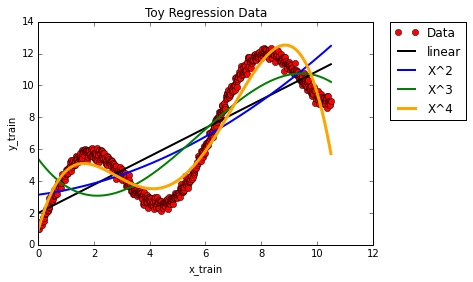

In [8]:
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, linear.fittedvalues, 'black', lw = 2)
plt.plot(x_train, x2.fittedvalues, 'blue', lw = 2)
plt.plot(x_train, x3.fittedvalues, 'green', lw = 2)
plt.plot(x_train, x4.fittedvalues, 'orange', lw = 3)

plt.legend(['Data', 'linear', 'X^2', 'X^3', 'X^4'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Toy Regression Data')
plt.show()

<b>Comment:</b> It would be great to walk through exactly how these lines are changing to confirm I understand correctly. 

<b>Apply Formulas to Test Data:</b>

In [9]:
x_test = test_df['X']
y_test = test_df['y']

#Using Scipy
T_regression_train_scipy = stats.linregress(x_test, y_test)
print T_regression_train_scipy
print ''

#Using provided formula:
T_linear = smf.ols(formula='y ~ 1 + X', data=test_df).fit()
print 'Linear Model'
print T_linear.summary()
print''

#Using provided quadratic fit:
T_x2 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=test_df).fit()
print 'X^2 Model'
print T_x2.summary()
print''
#More polynomial lines:
T_x3 = smf.ols(formula='y ~ 1 + X + I(X**2) + I(X**3)', data=test_df).fit()
print 'X^3 Model'
print T_x3.summary()
print''
T_x4 = smf.ols(formula='y ~ 1 + X + I(X**2) + I(X**3) + I(X**4)', data=test_df).fit()
print 'X^$ Model'
print T_x4.summary()

(2.7143928214910051, -20.676209586637881, 0.9785232462697635, 1.9588067857501939e-206, 0.033124422536071597)

Linear Model
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     6715.
Date:                Wed, 11 Nov 2015   Prob (F-statistic):          1.96e-206
Time:                        15:46:49   Log-Likelihood:                -336.79
No. Observations:                 300   AIC:                             677.6
Df Residuals:                     298   BIC:                             685.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------

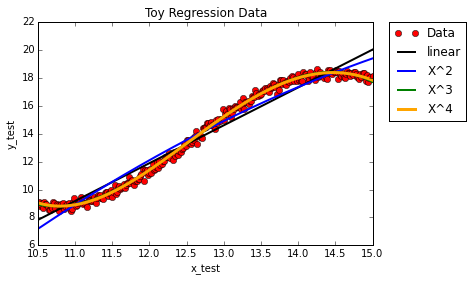

In [10]:
plt.plot(x_test, y_test, 'ro')
plt.plot(x_test, T_linear.fittedvalues, 'black', lw = 2)
plt.plot(x_test, T_x2.fittedvalues, 'blue', lw = 2)
plt.plot(x_test, T_x3.fittedvalues, 'green', lw = 2)
plt.plot(x_test, T_x4.fittedvalues, 'orange', lw = 3)

plt.legend(['Data', 'linear', 'X^2', 'X^3', 'X^4'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Toy Regression Data')
plt.show()

<b>Comment:</b> Will need to go over these models for better understanding. 

## Metrics and Cross Validation

When building a supervised model, it's important to have a clear idea of how you will evaluate its performance. As we've discussed, one crucial part of evaluation is to separate your training and testing set to avoid overfitting. Once we have done this, it's time to decide exactly what metric we will use to evaluate our model. Metrics differ between regression and classification models.

<b>Regression:</b>

1. <u>Mean Squared Error:</u> Mean square error between our predicted outcomes, and the true response in our test set.   
2. <u>Mean Absolute Error:</u> Mean absolute error between our predicted outcomes, and the true response in our test set.   
3. <u>R-Squared:</u> Coefficient of determination from regression score function.

<b>Classification:</b>

1. <u>Accuracy:</u> The percentage of data points labeled correctly by the model.   
2. <u>Precision:</u> The ratio of (true positives / (true_positives + true_negatives)). The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.   
3. <u>Recall:</u> The ratio of (true_positives / (true_positives + false_negatives)). The recall is intuitively the ability of the classifier to find all the positive samples.   

A typical work flow while building a model is to split your data, build your model, and then choose a metric to evaluate it.
For instance, suppose we wanted to build a classifier to predict whether or not an individual had cancer. In this scenario, the harm of incorrectly predicting that some one does not have cancer who actually does is far worse than predicting that a healthy person has cancer. Thus, we want to minimize our false negatives, and might choose recall as our metric.

It is often desirable to use <b>cross validation</b> to get a further estimate of your models performance. In cross validation, we take our training set, and iterative split it into folds of subtraining and sub_testing data (I've added the sub prefix to avoid confusion between the original train/test split we performed). We train our model on the sub_train folds, and evaluate it on the sub_test fold. The basic approach is this:

1. The training set is split into k smaller sets (the value of k will give the name of the cross validation approach; for example, if k=10, we are implementing 10-fold cross validation).
2. The model is trained on k - 1 of these smaller sets.
3. The resulting model is validated on the remaining set.

The score of the model for each of the training sets is then aggregated to produce a final score. Scikit-learn gives great examples of cross validation (http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators).

## Challenge

1. Take the loan data and process it as you did previously to build your linear regression model.
2. Break the data-set into 10 segments following the example provided in KFold (above link). 
3. Compute each of the performance metric (MAE, MSE or R2) for all the folds. The average would be the performance of your model.
4. Comment on each of the performance metric you obtained.

In [11]:
np.set_printoptions(suppress=True) #suppress scientific notation for easier reading

In [13]:
#load loansdata:
loansData = pd.read_csv('loansData_clean.csv')
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score
0,20000,20000,0.089,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735
1,19200,19200,0.121,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715
2,35000,35000,0.220,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690
3,10000,9975,0.100,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695
4,12000,12000,0.117,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695


<b>Original Regression Model:</b>

In [14]:
loan_data = loansData[['FICO.Score', 'Amount.Requested']] #independant variables
loan_target = loansData['Interest.Rate'] #what we are trying to predict

#create model:
data_X = sm.add_constant(loan_data)
loan_model = sm.OLS(loan_target, data_X)
loan_fitted = loan_model.fit()

#show summary:
print loan_fitted.summary()
print ''
#Get the fitted coefficients from the results:
print loan_fitted.params

                            OLS Regression Results                            
Dep. Variable:          Interest.Rate   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2387.
Date:                Wed, 11 Nov 2015   Prob (F-statistic):               0.00
Time:                        15:49:57   Log-Likelihood:                 5724.4
No. Observations:                2500   AIC:                        -1.144e+04
Df Residuals:                    2497   BIC:                        -1.143e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                0.7295      0.010  

<b>Introduce Cross-Validation:</b>

KFold divides all the samples in k groups of samples, called folds (if k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k - 1 folds, and the fold left out is used for test.

<b>Using Kfold, break the data into 10 segments:</b>

In [15]:
from sklearn.cross_validation import KFold
from sklearn import cross_validation

In [16]:
loan_CV = KFold(len(loansData), n_folds=10, shuffle=True) 
for train, test in loan_CV:
    print 'Train:', train[:10]
    print 'Test:', test[:10]
    print ''

Train: [ 0  1  2  3  4  5  6  7  8 10]
Test: [  9  14  21  46  49  51  77  79  86 107]

Train: [ 0  1  2  3  5  7  9 10 11 12]
Test: [ 4  6  8 15 19 20 26 27 37 41]

Train: [ 0  1  2  4  5  6  8  9 10 11]
Test: [ 3  7 17 18 54 56 57 60 63 68]

Train: [0 1 2 3 4 5 6 7 8 9]
Test: [ 38  58  61  75  81  85  93 124 134 137]

Train: [ 0  2  3  4  5  6  7  8  9 10]
Test: [  1  16  28  31  32  71  73  74 109 143]

Train: [ 0  1  2  3  4  6  7  8  9 10]
Test: [ 5 13 30 40 52 53 66 69 78 94]

Train: [0 1 2 3 4 5 6 7 8 9]
Test: [12 23 25 29 34 35 44 67 70 84]

Train: [ 0  1  3  4  5  6  7  8  9 10]
Test: [  2  33  39  55  59  87  89 112 113 120]

Train: [0 1 2 3 4 5 6 7 8 9]
Test: [ 11  22  24  76  92 102 103 116 123 129]

Train: [ 1  2  3  4  5  6  7  8  9 11]
Test: [ 0 10 36 43 48 50 62 80 82 95]



<b>A few notes about the above method:</b>

1. The first argument above is the # of samples we want to deal with. Since we’re doing KFCV (KFold Cross Validation) over our entire dataset, we set it to the length of x: len(loansData)
2. The second argument is the # of folds; 10 is often used: n_folds=10
3. The third argument , shuffle, means that KFCV will mix around the data (as you’ll see above), meaning the generated test data won’t be necessarily 0, 1, 2, 3, etc. Although shuffle allows you to throw in some randomness, you don’t want to set shuffle to true for some datasets. For example, if you’re working with the well-known iris dataset where samples 1-50 are from one kind of flower and samples from 50 on are for another kind of flower, you don’t necessarily want to mix up samples 1-50 and 50+.

<b>Additional Comment:</b> What is showing above are the index positions for the rows that will be in each fold. For clarity, in fold 1, training data will consist of the values for the Fico Score and Amount Requested at index position [0,1,2,3, etc] and the testing data will be the values for the Interest Rate at index position [22,29,45,38, etc] <b>*NOTE:</b> each time you run this the index positions will change.

<b>Value Added Function:</b> Sometimes it is advantageous to see only a short summary of the coeff section of a model, the below code allows us to do that:

In [17]:
# a utility function to only show the coeff section of summary; If wanted. 
from IPython.core.display import HTML
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

#Recall our original regression model, here is the short version output:
short_summary(loan_fitted)

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,0.7295,0.010,73.712,0.000,0.710 0.749
FICO.Score,-0.0009,1.41e-05,-63.018,0.000,-0.001 -0.001
Amount.Requested,2.11e-06,6.31e-08,33.433,0.000,1.99e-06 2.23e-06


<b>Predict Interest Rates:</b>   
Code used to predict interest rates given the coefficients from the linear regression model.

dataset['predicted_rate'] = (coeff[0] + (coeff[1]*dataset['FICO.Score']) + (coeff[2]*dataset['Amount.Requested']))

Validate coeffs:

In [19]:
original_coeff = loan_fitted.params
print original_coeff[0]
print original_coeff[1]
print original_coeff[2]

0.72952118678
-0.00088546857995
2.10954404415e-06


<b>Set up code to train model and predict interset rates on each fold:</b>

First we need to create a dataframe with only the columns we want in it:

In [38]:
cv_loan_data = loansData.loc[:,('FICO.Score', 'Amount.Requested', 'Interest.Rate')]
print cv_loan_data.head(2)
print cv_loan_data.shape

   FICO.Score  Amount.Requested  Interest.Rate
0         735             20000          0.089
1         715             19200          0.121
(2500, 3)


Second, we use this dataset to create our 10 folds:

In [50]:
testing_CV = KFold(len(cv_loan_data), n_folds=10, shuffle=True)

fold = 1
for train, test in testing_CV:
    
    train = cv_loan_data.loc[train] #independant variables
    test = cv_loan_data.loc[test] #what we are trying to predict
    
    print 'Fold:', fold
    print 'Training Rows:', len(train)
    print train[:2]
    print 'Testing Rows:', len(test)
    print test[:2]
    print ''
    fold += 1

Fold: 1
Training Rows: 2250
   FICO.Score  Amount.Requested  Interest.Rate
0         735             20000          0.089
2         690             35000          0.220
Testing Rows: 250
   FICO.Score  Amount.Requested  Interest.Rate
1         715             19200          0.121
6         720             10000          0.079

Fold: 2
Training Rows: 2250
   FICO.Score  Amount.Requested  Interest.Rate
0         735             20000          0.089
1         715             19200          0.121
Testing Rows: 250
    FICO.Score  Amount.Requested  Interest.Rate
7          705             33500          0.171
27         675              8000          0.153

Fold: 3
Training Rows: 2250
   FICO.Score  Amount.Requested  Interest.Rate
0         735             20000          0.089
1         715             19200          0.121
Testing Rows: 250
    FICO.Score  Amount.Requested  Interest.Rate
8          685             14675          0.143
15         730             25000          0.157

Fold: 4

Now we expand on that code to build the regression model on each fold's training set and predict interest rates on each fold's testing set:

In [64]:
testing_CV1 = KFold(len(cv_loan_data), n_folds=10, shuffle=True)

fold = 1
master_intercept = []
master_fico_coeff = []
master_amount_coeff = []

for train, test in testing_CV1:
    
    train = cv_loan_data.loc[train] #independant variables
    test = cv_loan_data.loc[test] #what we are trying to predict
    
    train_data = train[['FICO.Score', 'Amount.Requested']] #independant variables
    train_target = train['Interest.Rate'] #what we are trying to predict
    
    #create model:
    data_X = sm.add_constant(train_data)
    train_model = sm.OLS(train_target, data_X)
    train_fitted = train_model.fit()
    
    #get the fitted coefficients:
    train_coeff = train_fitted.params
    
    #get the r-squared value:
    r_square = train_fitted.rsquared
    
    #predict interest rates on the test data:
    test['predicted_int'] = (train_coeff[0] + (train_coeff[1]*test['FICO.Score']) + \
                             (train_coeff[2]*test['Amount.Requested']))
    
    #get the SE (squared error) for each pair of actual vs. estimated:
    test['se'] = ((test['Interest.Rate'] - test['predicted_int'])**2)
    
    #get the AE (absolute error) for each pair of actual vs. estimated:
    test['ae'] = (abs(test['Interest.Rate'] - test['predicted_int']))
    
    #Calculate the MSE (mean squared error) for the fold:
    squared_errors = test['se']
    mse = squared_errors.mean()
    
    #Calculate the RMSE (root mean squared error) for the fold:
    rmse = np.sqrt(mse)
    
    #Calculate the MAE (mean absolute error) for the fold:
    absolute_errors = test['ae']
    mae = absolute_errors.mean()
    
    #append ceoff to list to get overall model parameters:
    master_intercept.append(train_coeff[0])
    master_fico_coeff.append(train_coeff[1])
    master_amount_coeff.append(train_coeff[2])
    
    print 'Fold:', fold
    print 'R-Squared:', r_square
    print 'MSE:', mse
    print 'RMSE:', rmse
    print 'MAE:', mae
    print ''
    fold += 1

print ''
print 'Original Regression vs. Regression Post KFold for Predicting Interest Rates'
print ''
    
#Calculate Final Model Parameters:
final_intercept = np.mean(master_intercept)
final_fico_coeff = np.mean(master_fico_coeff)
final_amount_coeff = np.mean(master_amount_coeff)

#Test the Final Model to see if it gives a better result than our original regression model:
cv_loan_data['KFold_prediction'] = (final_intercept + (final_fico_coeff * cv_loan_data['FICO.Score']) + \
                                    (final_amount_coeff * cv_loan_data['Amount.Requested']))

cv_loan_data['original_prediction'] = (original_coeff[0] + (original_coeff[1] * cv_loan_data['FICO.Score']) + \
                                    (original_coeff[2] * cv_loan_data['Amount.Requested']))

#Compare the accuracy betwen the two models:

#get the SE (squared error) for each pair of actual vs. estimated:
cv_loan_data['se_org'] = ((cv_loan_data['Interest.Rate'] - cv_loan_data['original_prediction'])**2)
cv_loan_data['se_KFold'] = ((cv_loan_data['Interest.Rate'] - cv_loan_data['KFold_prediction'])**2)
    
#get the AE (absolute error) for each pair of actual vs. estimated:
cv_loan_data['ae_org'] = (abs(cv_loan_data['Interest.Rate'] - cv_loan_data['original_prediction']))
cv_loan_data['ae_KFold'] = (abs(cv_loan_data['Interest.Rate'] - cv_loan_data['KFold_prediction']))
    
#Calculate the MSE (mean squared error) for the comparison:
squared_errors_org = cv_loan_data['se_org']
mse_org = squared_errors_org.mean()
squared_errors_KFold = cv_loan_data['se_KFold']
mse_KFold = squared_errors_KFold.mean()
    
#Calculate the RMSE (root mean squared error) for the comparison:
rmse_org = np.sqrt(mse_org)
rmse_KFold = np.sqrt(mse_KFold)
    
#Calculate the MAE (mean absolute error) for the comparison:
absolute_errors_org = cv_loan_data['ae_org']
mae_org = absolute_errors_org.mean()
absolute_errors_KFold = cv_loan_data['ae_KFold']
mae_KFold = absolute_errors_KFold.mean()

print 'Original Regression MSE:', mse_org
print 'KFold Regression MSE:', mse_KFold
print ''
print 'Oringal Regression RMSE:', rmse_org
print 'KFold Regression RMSE:', rmse_KFold
print ''
print 'Original Regression MAE:', mae_org
print 'KFold Regression MAE:', mae_KFold

Fold: 1
R-Squared: 0.654799918615
MSE: 0.00061922535471
RMSE: 0.0248842390824
MAE: 0.0194808313978

Fold: 2
R-Squared: 0.651577439768
MSE: 0.000538991687793
RMSE: 0.0232161945157
MAE: 0.0183947271676

Fold: 3
R-Squared: 0.665191524967
MSE: 0.000630628526424
RMSE: 0.0251123182208
MAE: 0.0199259640614

Fold: 4
R-Squared: 0.653773528103
MSE: 0.00061662221105
RMSE: 0.0248318789271
MAE: 0.0197622425211

Fold: 5
R-Squared: 0.657165524524
MSE: 0.000594349258089
RMSE: 0.0243792792775
MAE: 0.0191448538627

Fold: 6
R-Squared: 0.658797433277
MSE: 0.000620447584047
RMSE: 0.0249087852784
MAE: 0.0197901472749

Fold: 7
R-Squared: 0.655103830432
MSE: 0.000573233831725
RMSE: 0.0239423021392
MAE: 0.0193841217662

Fold: 8
R-Squared: 0.657807023158
MSE: 0.000640133633005
RMSE: 0.0253008622977
MAE: 0.0201281380172

Fold: 9
R-Squared: 0.654662699928
MSE: 0.000574679925696
RMSE: 0.0239724826769
MAE: 0.0189003421149

Fold: 10
R-Squared: 0.657078690714
MSE: 0.00061368189727
RMSE: 0.0247726037644
MAE: 0.0194076

In [68]:
cv_loan_data_clarity = cv_loan_data.loc[:,('FICO.Score', 'Amount.Requested', 'Interest.Rate', 'KFold_prediction', \
                                          'original_prediction')]

cv_loan_data_clarity.head(20)

,FICO.Score,Amount.Requested,Interest.Rate,KFold_prediction,original_prediction
0,735,20000,0.089,0.120889,0.120893
1,715,19200,0.121,0.136912,0.136914
2,690,35000,0.220,0.192379,0.192382
3,695,10000,0.100,0.135215,0.135216
4,695,12000,0.117,0.139434,0.139435
5,670,6000,0.153,0.148915,0.148915
6,720,10000,0.079,0.113077,0.113079
7,705,33500,0.171,0.175932,0.175936
8,685,14675,0.143,0.153932,0.153933
9,715,7000,0.069,0.111177,0.111178


<b>In the end, I don't see any difference between the original regression predictions and the predictions after using KFold.</b>